<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Advanced%20Convolutions/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook, let us improve the below network with base validation Accuracy: 83.05 

## Improved validation accuracy:

### Importing libraries 

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras.utils import np_utils

### Loading CIFAR10 dataset 

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

**Visualize some sample Images from the dataset**

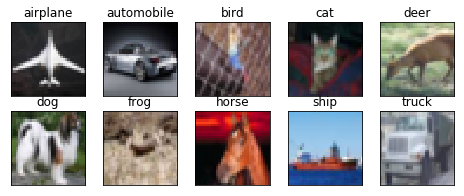

In [69]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

**Defining functions to plot model history, find accuracy**

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
def accuracy(test_iterator, model):
  _, accuracy = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
  return (accuracy * 100)

### Define Model and standardize the inputs

**Dividing pixel values by 255, standardize the inputs, also performed one hot encoding**

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [74]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_64 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_65 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 15, 15, 96)        41568     
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 23s 58ms/step - loss: 1.8570 - acc: 0.2920 - val_loss: 1.4865 - val_acc: 0.4436
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.3409 - acc: 0.5142 - val_loss: 1.1321 - val_acc: 0.5925
Epoch 3/50
390/390 [==============================] - 20s 51ms/step - loss: 1.1231 - acc: 0.5997 - val_loss: 1.0220 - val_acc: 0.6275
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.9736 - acc: 0.6605 - val_loss: 0.8386 - val_acc: 0.7091
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8699 - acc: 0.6984 - val_loss: 0.7761 - val_acc: 0.7308
Epoch 6/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7943 - acc: 0.7274 - val_loss: 0.7674 - val_acc: 0.7369
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7377 - acc: 0.7449 - val_loss: 0.7025 - val_acc: 0.7635
Epoch 8/50
390/390 [==============================] - 20s 51ms

## Redefined Network

Above network is redefined by

1.   Increased the channels and removed the bias parameters
2.   Redfine the architecture to use Convolution block followed by transition block
3.   Increased receptive field of network - 32x32 
4.   Added batch Normalization in model architecture after each convolution
5.   Normalized both training and validation images
6.   Modified the dropout values
7.   Removed dense layers








In [60]:
# Define the model
model = Sequential()
model.add(Convolution2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), use_bias=False)) #32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False)) #32 Because, border_mode=same, it will be equal to i/p dimensions
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(64, (1, 1), activation='relu', use_bias=False)) #32
model.add(MaxPooling2D(pool_size=(2, 2)))#16

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False)) #16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False)) #16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(64, (1, 1), activation='relu', use_bias=False)) #16
model.add(MaxPooling2D(pool_size=(2, 2)))#8

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False)) #8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False)) #8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(10, 8, 8, use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8), use_bias=False)`


In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 128)       3456      
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_57 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 256)       294912    
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 256)       0         
__________

In [0]:
# checkpoint
filepath="/content/drive/My Drive/AdvancedConvolutions/Assignment6A/Models/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')

In [0]:
callbacks_list = [earlystop, checkpoint]

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
training_generator= datagen.flow(train_features, train_labels, batch_size=128)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(training_generator,
                                 steps_per_epoch = len(training_generator), epochs = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 1/100
391/391 [==============================] - 88s 225ms/step - loss: 1.8576 - acc: 0.4291 - val_loss: 7.3326 - val_acc: 0.2769

Epoch 00001: val_acc improved from -inf to 0.27690, saving model to /content/drive/My Drive/AdvancedConvolutions/Assignment6A/Models/weights-01-0.28.hdf5
Epoch 2/100
391/391 [==============================] - 85s 217ms/step - loss: 1.4945 - acc: 0.5567 - val_loss: 1.1011 - val_acc: 0.6077

Epoch 00002: val_acc improved from 0.27690 to 0.60770, saving model to /content/drive/My Drive/AdvancedConvolutions/Assignment6A/Models/weights-02-0.61.hdf5
Epoch 3/100
391/391 [==============================] - 85s 217ms/step - loss: 0.8865 - acc: 0.6880 - val_loss: 0.9270 - val_acc: 0.6736

Epoch 00003: val_acc improved from 0.60770 to 0.67360, saving model to /content/drive/My Drive/AdvancedConvolutions/Assignment6A/Models/weights-03-0.67.hdf5
Epoch 4/100
391/391 [==============================] - 85s 218ms/step - loss: 0.7336 - acc: 0.7433 - val_loss: 0.7689 - v

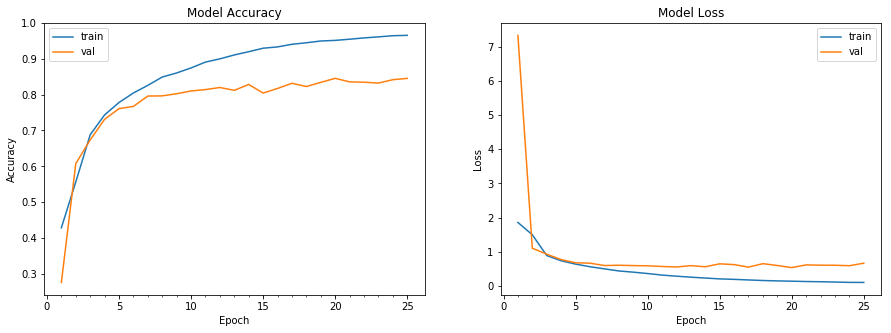

Accuracy on test data is: 84.48


In [66]:
from keras.preprocessing.image import ImageDataGenerator

# applying transformation to image
train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit the data augmentation
train_gen.fit(train_features)
test_gen.fit(test_features)

training_generator= train_gen.flow(train_features, train_labels, batch_size=128)
testing_generator= test_gen.flow(test_features, test_labels, batch_size=128, shuffle=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(training_generator, 
                    steps_per_epoch = len(training_generator),
                    epochs=100,
                    validation_data = testing_generator,
                    validation_steps = len(testing_generator),
                    callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(testing_generator, model))